# Sheet 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import time

## 2) Random numbers

(b) Inverse Transform Sampling

In [3]:
N = 100000
r = np.random.rand(N)

TODO: Derive expression for $G^{-1}(F(x))$

In [ ]:
t0 = time.time()

# TODO: Calculate x following g1
x = ...

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(0,1)
plt.hist(x, range=(0,1), bins=100, density=True)
plt.plot(x0, 3*x0**2)
plt.show()

$G_1(x) = x^3 \to G_1^{-1}(x) = \sqrt[3]{x}$

Generated 100000 random numbers in 0.0099 s


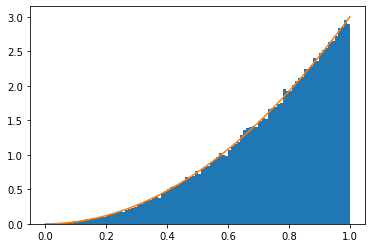

In [4]:
# SOLUTION
t0 = time.time()

x = r**(1/3)

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(0,1)
plt.hist(x, range=(0,1), bins=100, density=True)
plt.plot(x0, 3*x0**2)
plt.show()

TODO: Derive expression for $G^{-1}(F(x))$

In [ ]:
t0 = time.time()

# TODO: Calculate x following g2
x = ...

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(0,5)
plt.hist(x, range=(0,5), bins=100, density=True)
plt.plot(x0, np.exp(-x0))
plt.show()

$G_2(x) = \int_0^x dt e^{-t} = 1-e^{-t} \to G_2^{-1}(x) = -\log (1-x)$

Generated 100000 random numbers in 0.0068 s


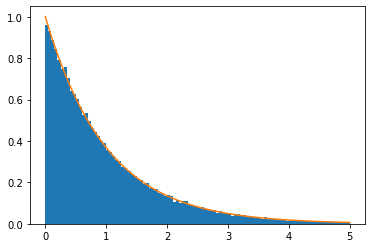

In [5]:
# SOLUTION
t0 = time.time()

x = -np.log(1-r)

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(0,5)
plt.hist(x, range=(0,5), bins=100, density=True)
plt.plot(x0, np.exp(-x0))
plt.show()

TODO: Derive expression for $G^{-1}(F(x))$

In [ ]:
t0 = time.time()

# TODO: Calculate x following g3
x = ...

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(-5,5)
plt.hist(x, range=(-5,5), bins=100, density=True)
plt.plot(x0, 1/(2*np.pi)**.5 * np.exp(-x0**2/2))
plt.show()

$G_3(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^x dt e^{-t^2/2} = \frac{1}{\sqrt{\pi}} \int_{-\infty}^{x/\sqrt{2}} du e^{-u^2} = \frac{1}{\sqrt{\pi}}\Big( \int_{-\infty}^0 du e^{-u^2} + \int_0^{x/\sqrt{2}}du e^{-u^2}\Big) = \frac{1}{2}\Big(1+\mathrm{erf}\frac{x}{\sqrt{2}}\Big) \to G_3^{-1} = \sqrt{2}\mathrm{erfinv}(2x-1)$

Generated 100000 random numbers in 0.0150 s


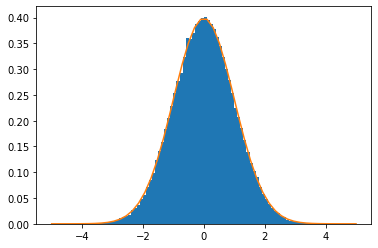

In [16]:
# SOLUTION
t0 = time.time()

x = 2**.5 * sp.erfinv(2*r-1) 

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(-5,5)
plt.hist(x, range=(-5,5), bins=100, density=True)
plt.plot(x0, 1/(2*np.pi)**.5 * np.exp(-x0**2/2))
plt.show()

TODO: Derive expression for $G^{-1}(F(x))$

In [ ]:
t0 = time.time()

# TODO: Calculate x following g4
# You do not have to evaluate the zeta function 
x = ...

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(0,5)
plt.hist(x, range=(0,5), bins=100, density=True)
plt.plot(x0, 2/(3*sp.zeta(3)) * x0**2/(np.exp(x0)+1) 
         / 0.862177) # correction factor for limited x range
plt.show()

Integrating the Fermi-Dirac distribution yields an expression with Polylogarithms, but this can not be inverted. Therefore, inverse transform sampling is not possible in this case.

(c) rejection sampling

In [9]:
g_accept = np.random.rand(N)

In [ ]:
t0 = time.time()

# TODO: Generate random numbers following g1
x_proposal = r
x = ...

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

plt.hist(x, range=(0,5), bins=100, density=True)
plt.show()

Generated 33263 random numbers in 0.0030 s


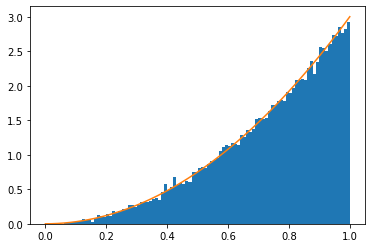

In [10]:
# SOLUTION
t0 = time.time()

x_proposal = r
g_proposal = 3*r**2
g_max = np.max(g_proposal)
mask = np.array(g_proposal > g_max * g_accept)
x = x_proposal[mask]

t1 = time.time()

Neff = len(x)
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(0,1)
plt.hist(x, range=(0,1), bins=100, density=True)
plt.plot(x0, 3*x0**2)
plt.show()

In [ ]:
t0 = time.time()

# TODO: Generate random numbers following g2
x_proposal = 5*r
x = ...

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(0,5)
plt.hist(x, range=(0,5), bins=100, density=True)
plt.plot(x0, np.exp(-x0))
plt.show()

Generated 19775 random numbers in 0.0035 s


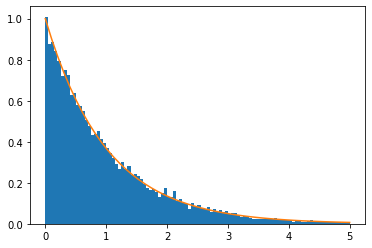

In [12]:
# SOLUTION
t0 = time.time()

x_proposal = 5*r
g_proposal = np.exp(-x_proposal)
g_max = np.max(g_proposal)
mask = np.array(g_proposal > g_max * g_accept)
x = x_proposal[mask]

t1 = time.time()

Neff = len(x)
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(0,5)
plt.hist(x, range=(0,5), bins=100, density=True)
plt.plot(x0, np.exp(-x0))
plt.show()

In [ ]:
t0 = time.time()

# TODO: Generate random numbers following g3
x_proposal = 10*r -5
x = ...

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(-5,5)
plt.hist(x, range=(-5,5), bins=100, density=True)
plt.plot(x0, 1/(2*np.pi)**.5 * np.exp(-x0**2/2))
plt.show()

Generated 25143 random numbers in 0.0068 s


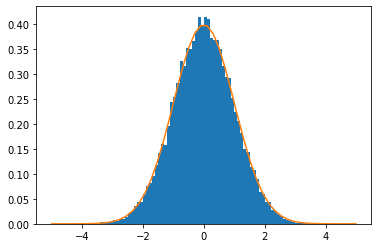

In [13]:
# SOLUTION
t0 = time.time()

x_proposal = 10*r -5
g_proposal = 1/(2*np.pi)**.5 * np.exp(-x_proposal**2/2) 
g_max = np.max(g_proposal)
mask = np.array(g_proposal > g_max * g_accept)
x = x_proposal[mask]

t1 = time.time()

Neff = len(x)
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(-5,5)
plt.hist(x, range=(-5,5), bins=100, density=True)
plt.plot(x0, 1/(2*np.pi)**.5 * np.exp(-x0**2/2))
plt.show()

In [ ]:
t0 = time.time()

# TODO: Generate random numbers following g4
# You do not have to evaluate the zeta function 
x_proposal = 5*r
x = ...

t1 = time.time()

print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(0,5)
plt.hist(x, range=(0,5), bins=100, density=True)
plt.plot(x0, 2/(3*sp.zeta(3)) * x0**2/(np.exp(x0)+1) 
         / 0.862177) 
# Note: Need the correction factor 0.862177 = \int_0^5 dx g_4(x) 
# to get the correct normalization
plt.show()

Generated 64367 random numbers in 0.0039 s


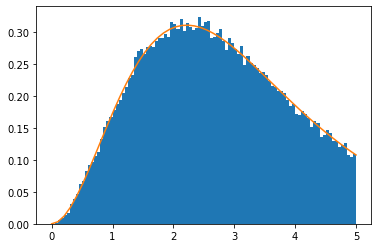

In [14]:
# SOLUTION
t0 = time.time()

x_proposal = r*5
g_proposal = x_proposal**2/(np.exp(x_proposal)+1)
g_max = np.max(g_proposal)
mask = np.array(g_proposal > g_max * g_accept)
x = x_proposal[mask]

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(0,5)
plt.hist(x, range=(0,5), bins=100, density=True)
plt.plot(x0, 2/(3*sp.zeta(3)) * x0**2/(np.exp(x0)+1) 
         / 0.862177) 
# Note: Need the correction factor 0.862177 = \int_0^5 dx g_4(x) 
# to get the correct normalization
plt.show()

Pros and cons of rejection sampling over inverse transform sampling
+ Works for any distribution (does not require inverse cdf)
- Slower, because have to reject samples

(d) Box-Muller transform

In [ ]:
t0 = time.time()

# TODO: Transform r into gaussian random numbers, but fast
x = ...

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(-5,5)
plt.hist(x, range=(-5,5), bins=100, density=True)
plt.plot(x0, 1/(2*np.pi)**.5 * np.exp(-x0**2/2))
plt.show()

Generated 100000 random numbers in 0.0069 s


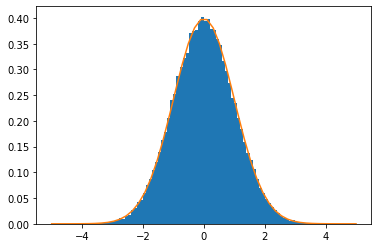

In [17]:
# SOLUTION
t0 = time.time()

r1, r2 = r[:N//2], r[N//2:]
x1 = np.sqrt(-2*np.log(1-r1)) * np.cos(2*np.pi*r2)
x2 = np.sqrt(-2*np.log(1-r1)) * np.sin(2*np.pi*r2)
x = np.concatenate((x1, x2))

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(-5,5)
plt.hist(x, range=(-5,5), bins=100, density=True)
plt.plot(x0, 1/(2*np.pi)**.5 * np.exp(-x0**2/2))
plt.show()